In [1]:
import pandas as pd

benchmark_df = pd.read_csv('../results/sift-benchmark.csv')
measure_df = pd.read_csv('../results/measure-time-sift.csv')

measure_df['query_time'] = benchmark_df['query_time']
measure_df.tail()

,predict_time,g_range,l_range,build_time,query_time
31,0.018213,20,7,143.726416,0.331900
32,0.016532,23,1,143.726416,0.112156
33,0.017582,23,3,143.726416,0.208920
34,0.016948,23,5,143.726416,0.274983
35,0.017848,23,7,143.726416,0.308237


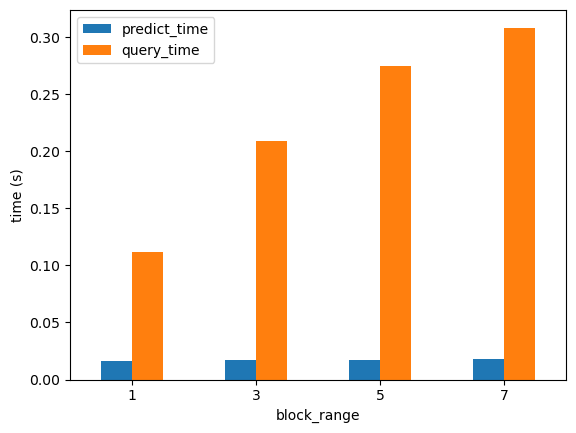

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
data = measure_df.query('g_range == 23')
df = pd.DataFrame({'predict_time': data['predict_time'], 'query_time': data['query_time'], 'block_range': data['l_range']})
ax = df.plot.bar(x="block_range", rot=0)
ax.set( ylabel='time (s)')

plt.show()

In [3]:
th_benchmark_df = pd.read_csv('../results/sift-benchmark-threshold.csv')
th_measure_df = pd.read_csv('../results/measure-time-threshold-sift.csv')

th_measure_df['query_time'] = th_benchmark_df['query_time']
th_measure_df.tail()

,predict_time,g_range,threshold,build_time,query_time
31,0.016420,20,0.05,143.726416,0.183308
32,0.015389,23,0.50,143.726416,0.118059
33,0.016418,23,0.10,143.726416,0.155986
34,0.016546,23,0.07,143.726416,0.167638
35,0.016778,23,0.05,143.726416,0.180534


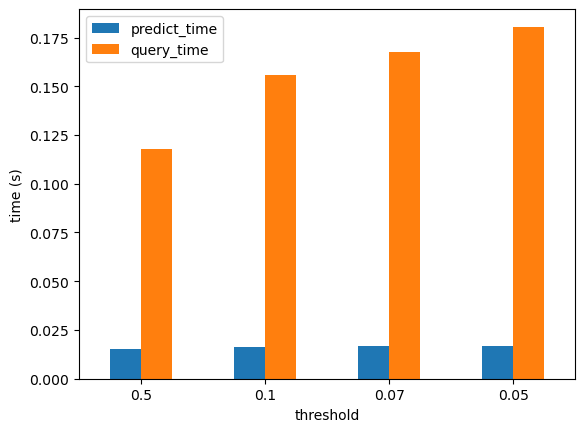

In [4]:
th_data = th_measure_df.query('g_range == 23')
th_data = pd.DataFrame({'predict_time': th_data['predict_time'], 'query_time': th_data['query_time'], 'threshold': th_data['threshold']})
ax = th_data.plot.bar(x="threshold", rot=0)
ax.set( ylabel='time (s)')

plt.show()

In [5]:

benchmark_df = pd.read_csv('../results/sift-benchmark.csv')
measure_df = pd.read_csv('../results/measure-time-sift.csv')

measure_df['recall'] = benchmark_df['recall']
measure_df['method'] = 'top_block_range'
measure_df.tail()

,predict_time,g_range,l_range,build_time,recall,method
31,0.018213,20,7,143.726416,0.9978,top_block_range
32,0.016532,23,1,143.726416,0.7231,top_block_range
33,0.017582,23,3,143.726416,0.9367,top_block_range
34,0.016948,23,5,143.726416,0.9868,top_block_range
35,0.017848,23,7,143.726416,0.9979,top_block_range


In [6]:
th_benchmark_df = pd.read_csv('../results/sift-benchmark-threshold.csv')
th_measure_df = pd.read_csv('../results/measure-time-threshold-sift.csv')

th_measure_df['recall'] = th_benchmark_df['recall']
th_measure_df['method'] = 'threshold'
th_measure_df.tail()

,predict_time,g_range,threshold,build_time,recall,method
31,0.016420,20,0.05,143.726416,0.9143,threshold
32,0.015389,23,0.50,143.726416,0.7487,threshold
33,0.016418,23,0.10,143.726416,0.8633,threshold
34,0.016546,23,0.07,143.726416,0.8920,threshold
35,0.016778,23,0.05,143.726416,0.9144,threshold


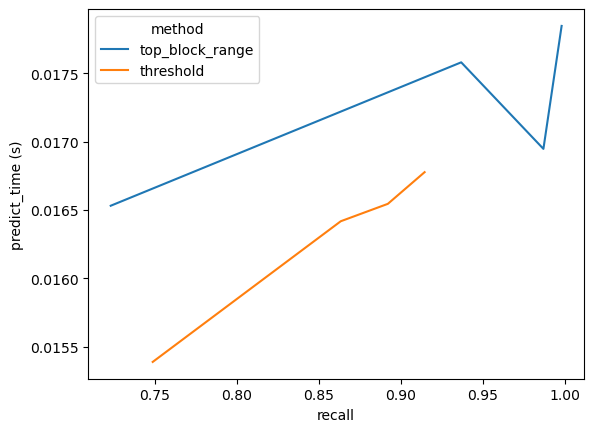

In [7]:
import seaborn as sns
df1 = measure_df.query('g_range == 23')[['method', 'recall', 'predict_time']]
df2= th_measure_df.query('g_range == 23')[['method', 'recall', 'predict_time']]
cmp_df = pd.concat([df1, df2])


ax = sns.lineplot(x="recall", y="predict_time", hue="method", markers=True, data=cmp_df)
ax.set(ylabel='predict_time (s)')

plt.show()

In [8]:
th_measure_df.query('g_range == 23')

,predict_time,g_range,threshold,build_time,recall,method
32,0.015389,23,0.50,143.726416,0.7487,threshold
33,0.016418,23,0.10,143.726416,0.8633,threshold
34,0.016546,23,0.07,143.726416,0.8920,threshold
35,0.016778,23,0.05,143.726416,0.9144,threshold


In [9]:
pd.concat([data, th_data])

,predict_time,g_range,l_range,build_time,query_time,threshold
32,0.016532,23.0,1.0,143.726416,0.112156,NaN
33,0.017582,23.0,3.0,143.726416,0.208920,NaN
34,0.016948,23.0,5.0,143.726416,0.274983,NaN
35,0.017848,23.0,7.0,143.726416,0.308237,NaN
32,0.015389,NaN,NaN,NaN,0.118059,0.50
33,0.016418,NaN,NaN,NaN,0.155986,0.10
34,0.016546,NaN,NaN,NaN,0.167638,0.07
35,0.016778,NaN,NaN,NaN,0.180534,0.05
